In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = sns.load_dataset("mpg").dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
mpg.describe().applymap(lambda x: round(x))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


<AxesSubplot:xlabel='horsepower', ylabel='weight'>

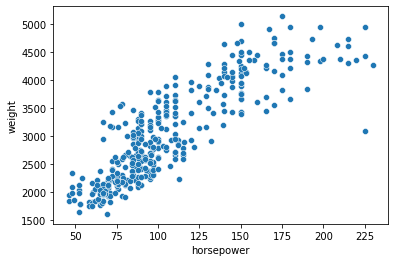

In [3]:
sns.scatterplot(x='horsepower', y='weight', data=mpg)

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

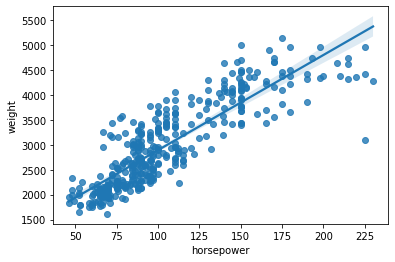

In [4]:
sns.regplot(x='horsepower', y='weight', data=mpg)

In [5]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [6]:
print (' r squared (preferred to r) is ' + str(mpg.corr()['weight']['horsepower']**2))

 r squared (preferred to r) is 0.7474254996898221


<AxesSubplot:xlabel='horsepower', ylabel='weight'>

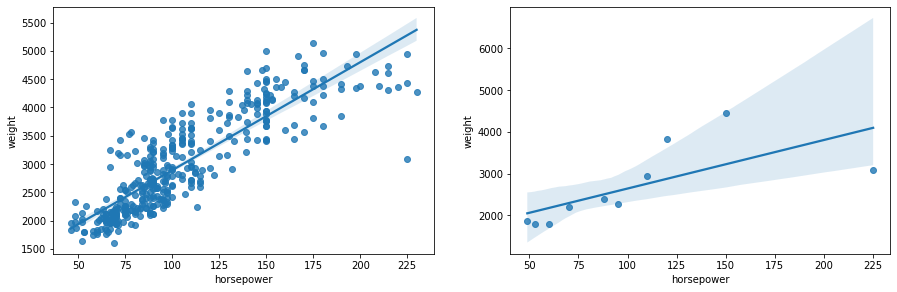

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.regplot(x='horsepower', y='weight', data=mpg, ci=95)

plt.subplot(2,2,2)
sns.regplot(x='horsepower', y='weight', data=mpg.sample(10, random_state=6), ci=95)


In [8]:
import statsmodels.api as sm
Y = mpg['weight']
X = mpg['horsepower']

model = sm.OLS(Y, X).fit()
model.predict(X)

0      3559.155868
1      4517.390141
2      4106.718310
3      4106.718310
4      3832.937089
          ...     
393    2354.518497
394    1423.662347
395    2299.762253
396    2162.871643
397    2245.006009
Length: 392, dtype: float64

In [16]:
import statsmodels.formula.api as smf
model = smf.ols(formula='weight ~ horsepower', data=mpg)
model = model.fit()
print(model.params)
print(model.rsquared)
print(model.summary())


Intercept     984.500327
horsepower     19.078162
dtype: float64
0.74742549968982
                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 04 May 2022   Prob (F-statistic):          1.36e-118
Time:                        05:50:59   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [10]:
model = model.fit()

In [11]:
print(model.params)

Intercept     984.500327
horsepower     19.078162
dtype: float64


In [12]:
model.rsquared

0.74742549968982

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 04 May 2022   Prob (F-statistic):          1.36e-118
Time:                        05:41:35   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.000     861.593    1107.408
horsepower    19.0782      0.562     33.972      0.000      17.974      20.182
==============================================================================
Omnibus:                       11.785   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.895
Skew:                           0.109   Prob(JB):                     1.76e-05
Kurtosis:                       4.137   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
sns.distplot(residuals)

NameError: name 'residuals' is not defined